####Fetching the dataset from Kaggle using kaggle.json

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d arjunbhasin2013/ccdata

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 43.8MB/s]


In [4]:
! unzip ccdata.zip

Archive:  ccdata.zip
  inflating: CC GENERAL.csv          


In [5]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_cc = pd.read_csv("/content/CC GENERAL.csv")
data_cc.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Exploratory Data Analysis

In [8]:
data_cc.shape

(8950, 18)

In [9]:
data_cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
data_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
data_cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:

# we can either drop nulls or impute them with mean values
data_cc["CREDIT_LIMIT"] = data_cc["CREDIT_LIMIT"].fillna(data_cc["CREDIT_LIMIT"].mean())
data_cc["MINIMUM_PAYMENTS"] = data_cc["MINIMUM_PAYMENTS"].fillna(data_cc["MINIMUM_PAYMENTS"].mean())
data_cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
#checking for duplicates
data_cc.duplicated().sum()
#if duplicates then data_cc.drop_duplicates()

0

In [14]:
# data_cc['CUST_ID']
data_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
#for training of the model - customer Id is not really relevant so we can drop it
data = data_cc.drop(columns = ["CUST_ID"])
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


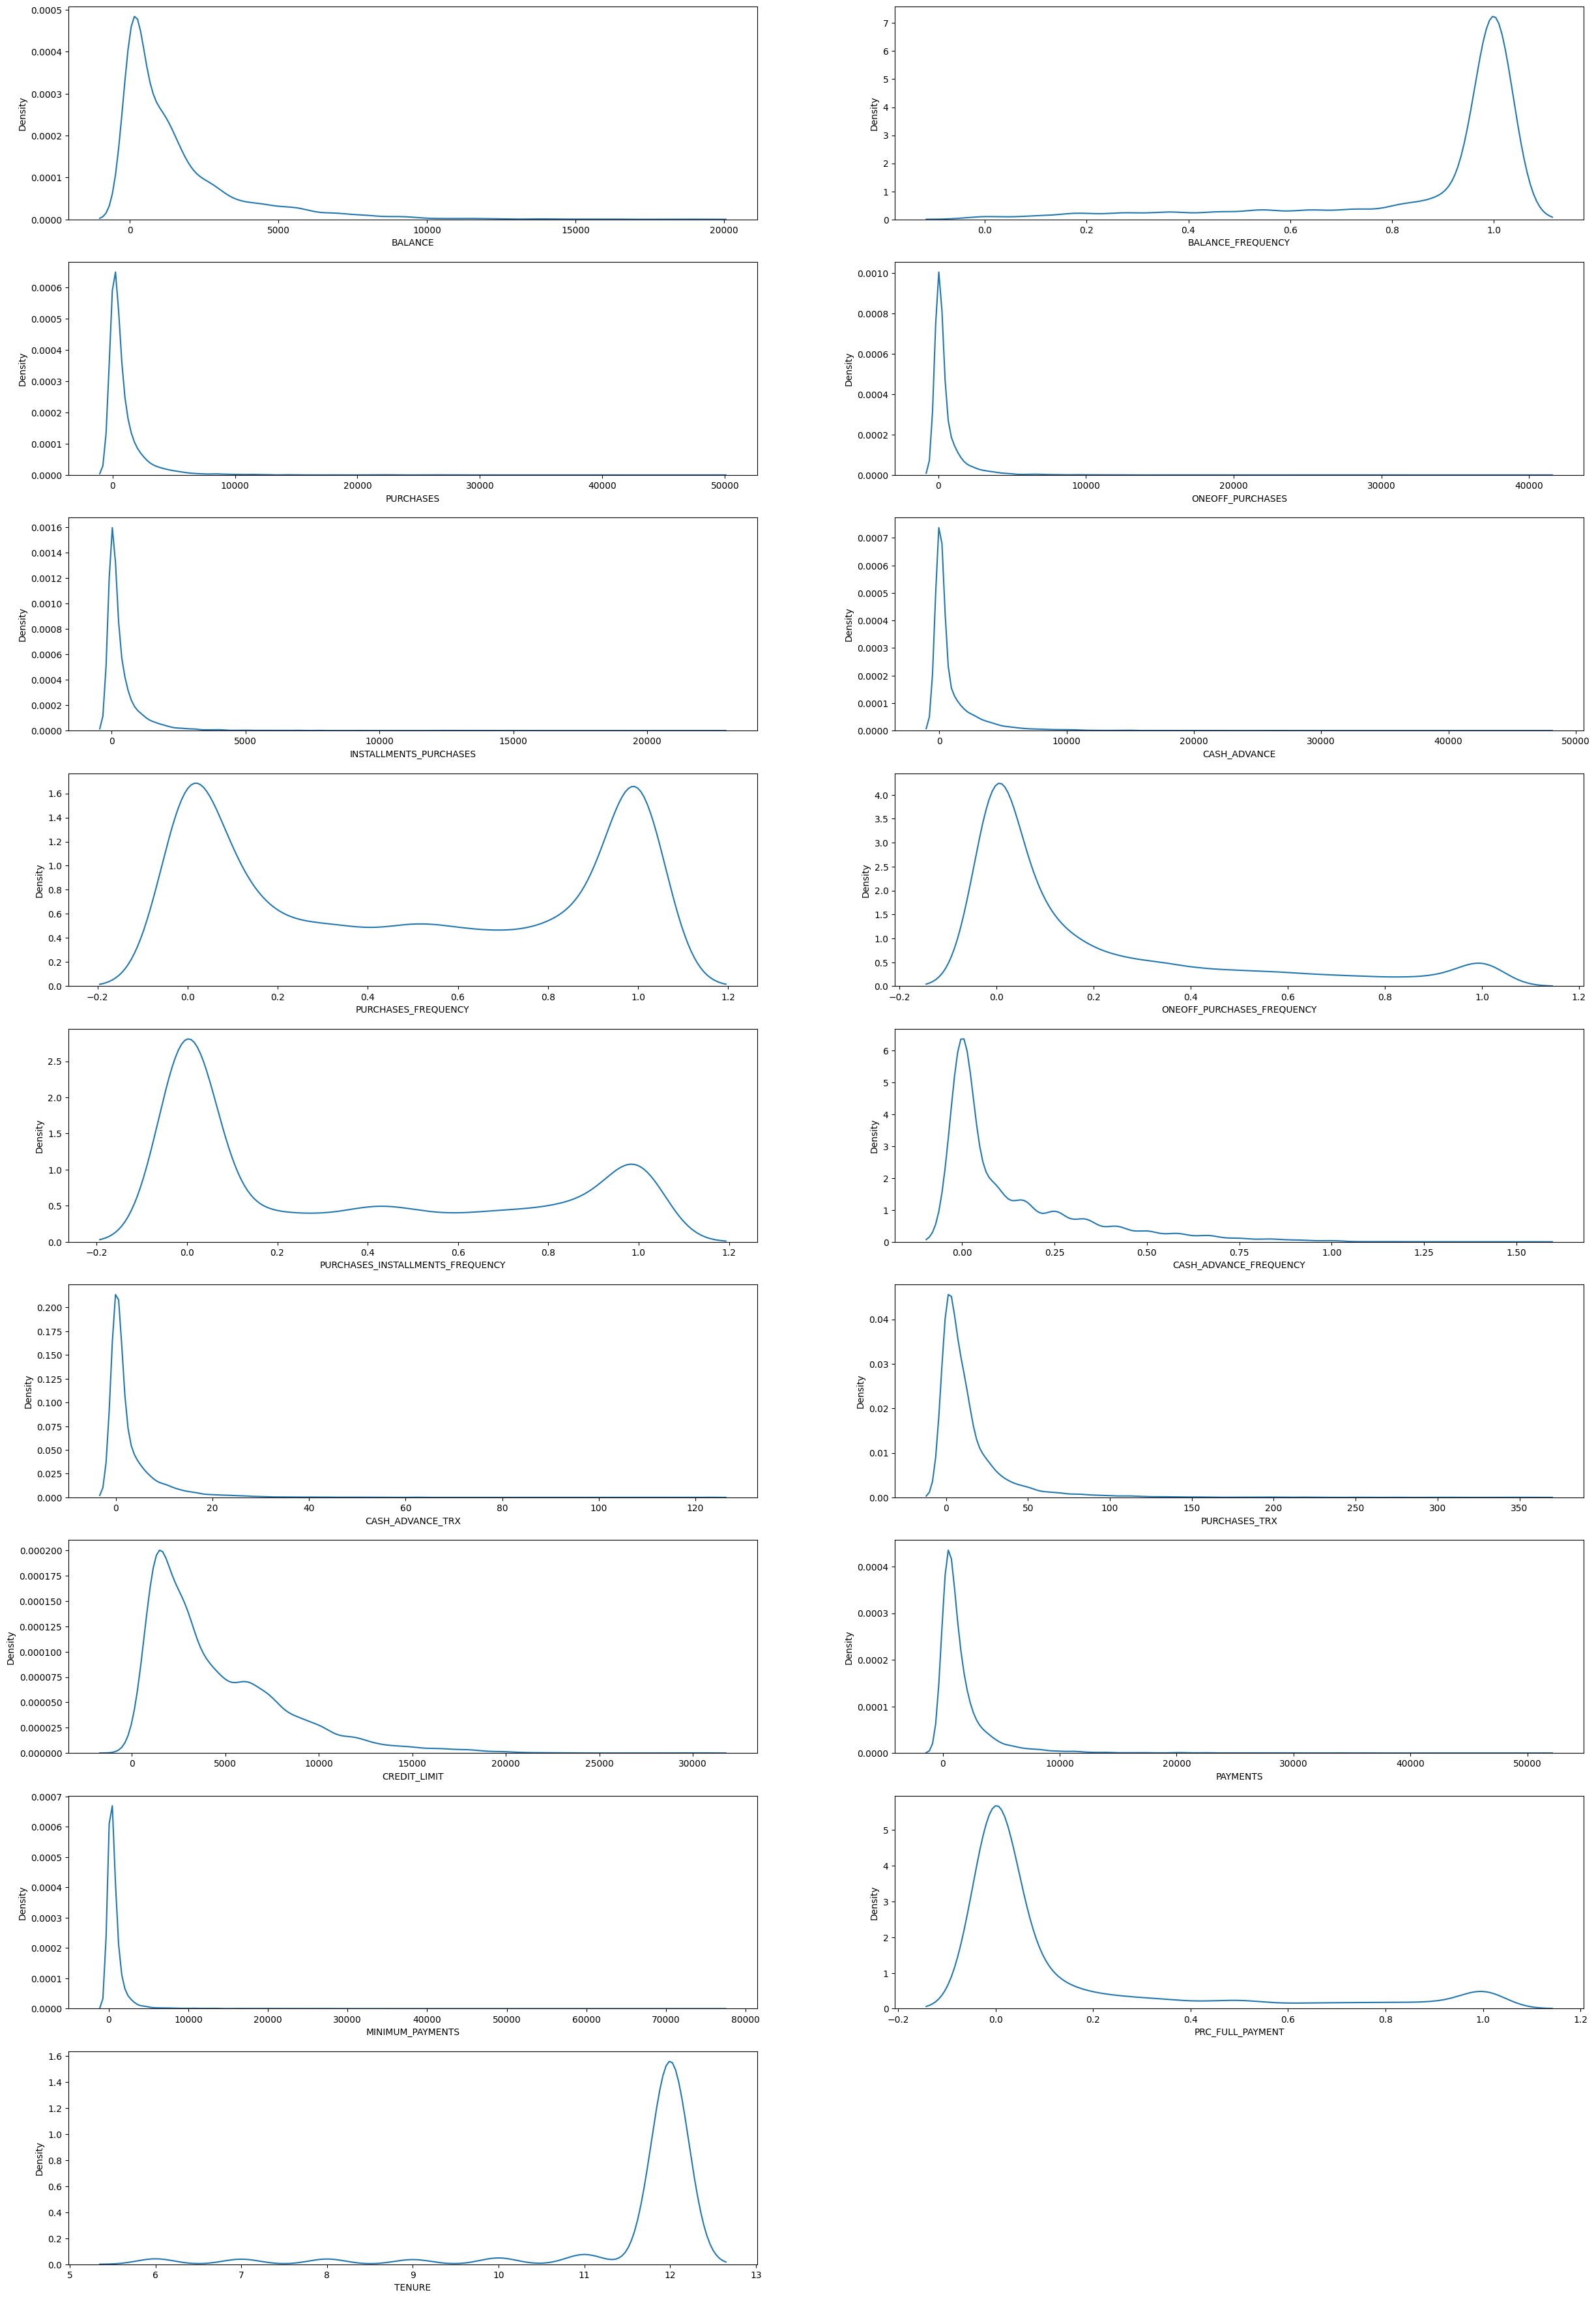

In [16]:
plt.figure(figsize = (30,45))
for i, j in enumerate(data.columns):
  ax = plt.subplot(9, 2, i+1)
  sns.kdeplot(data[j], ax = ax)
  plt.xlabel(j)

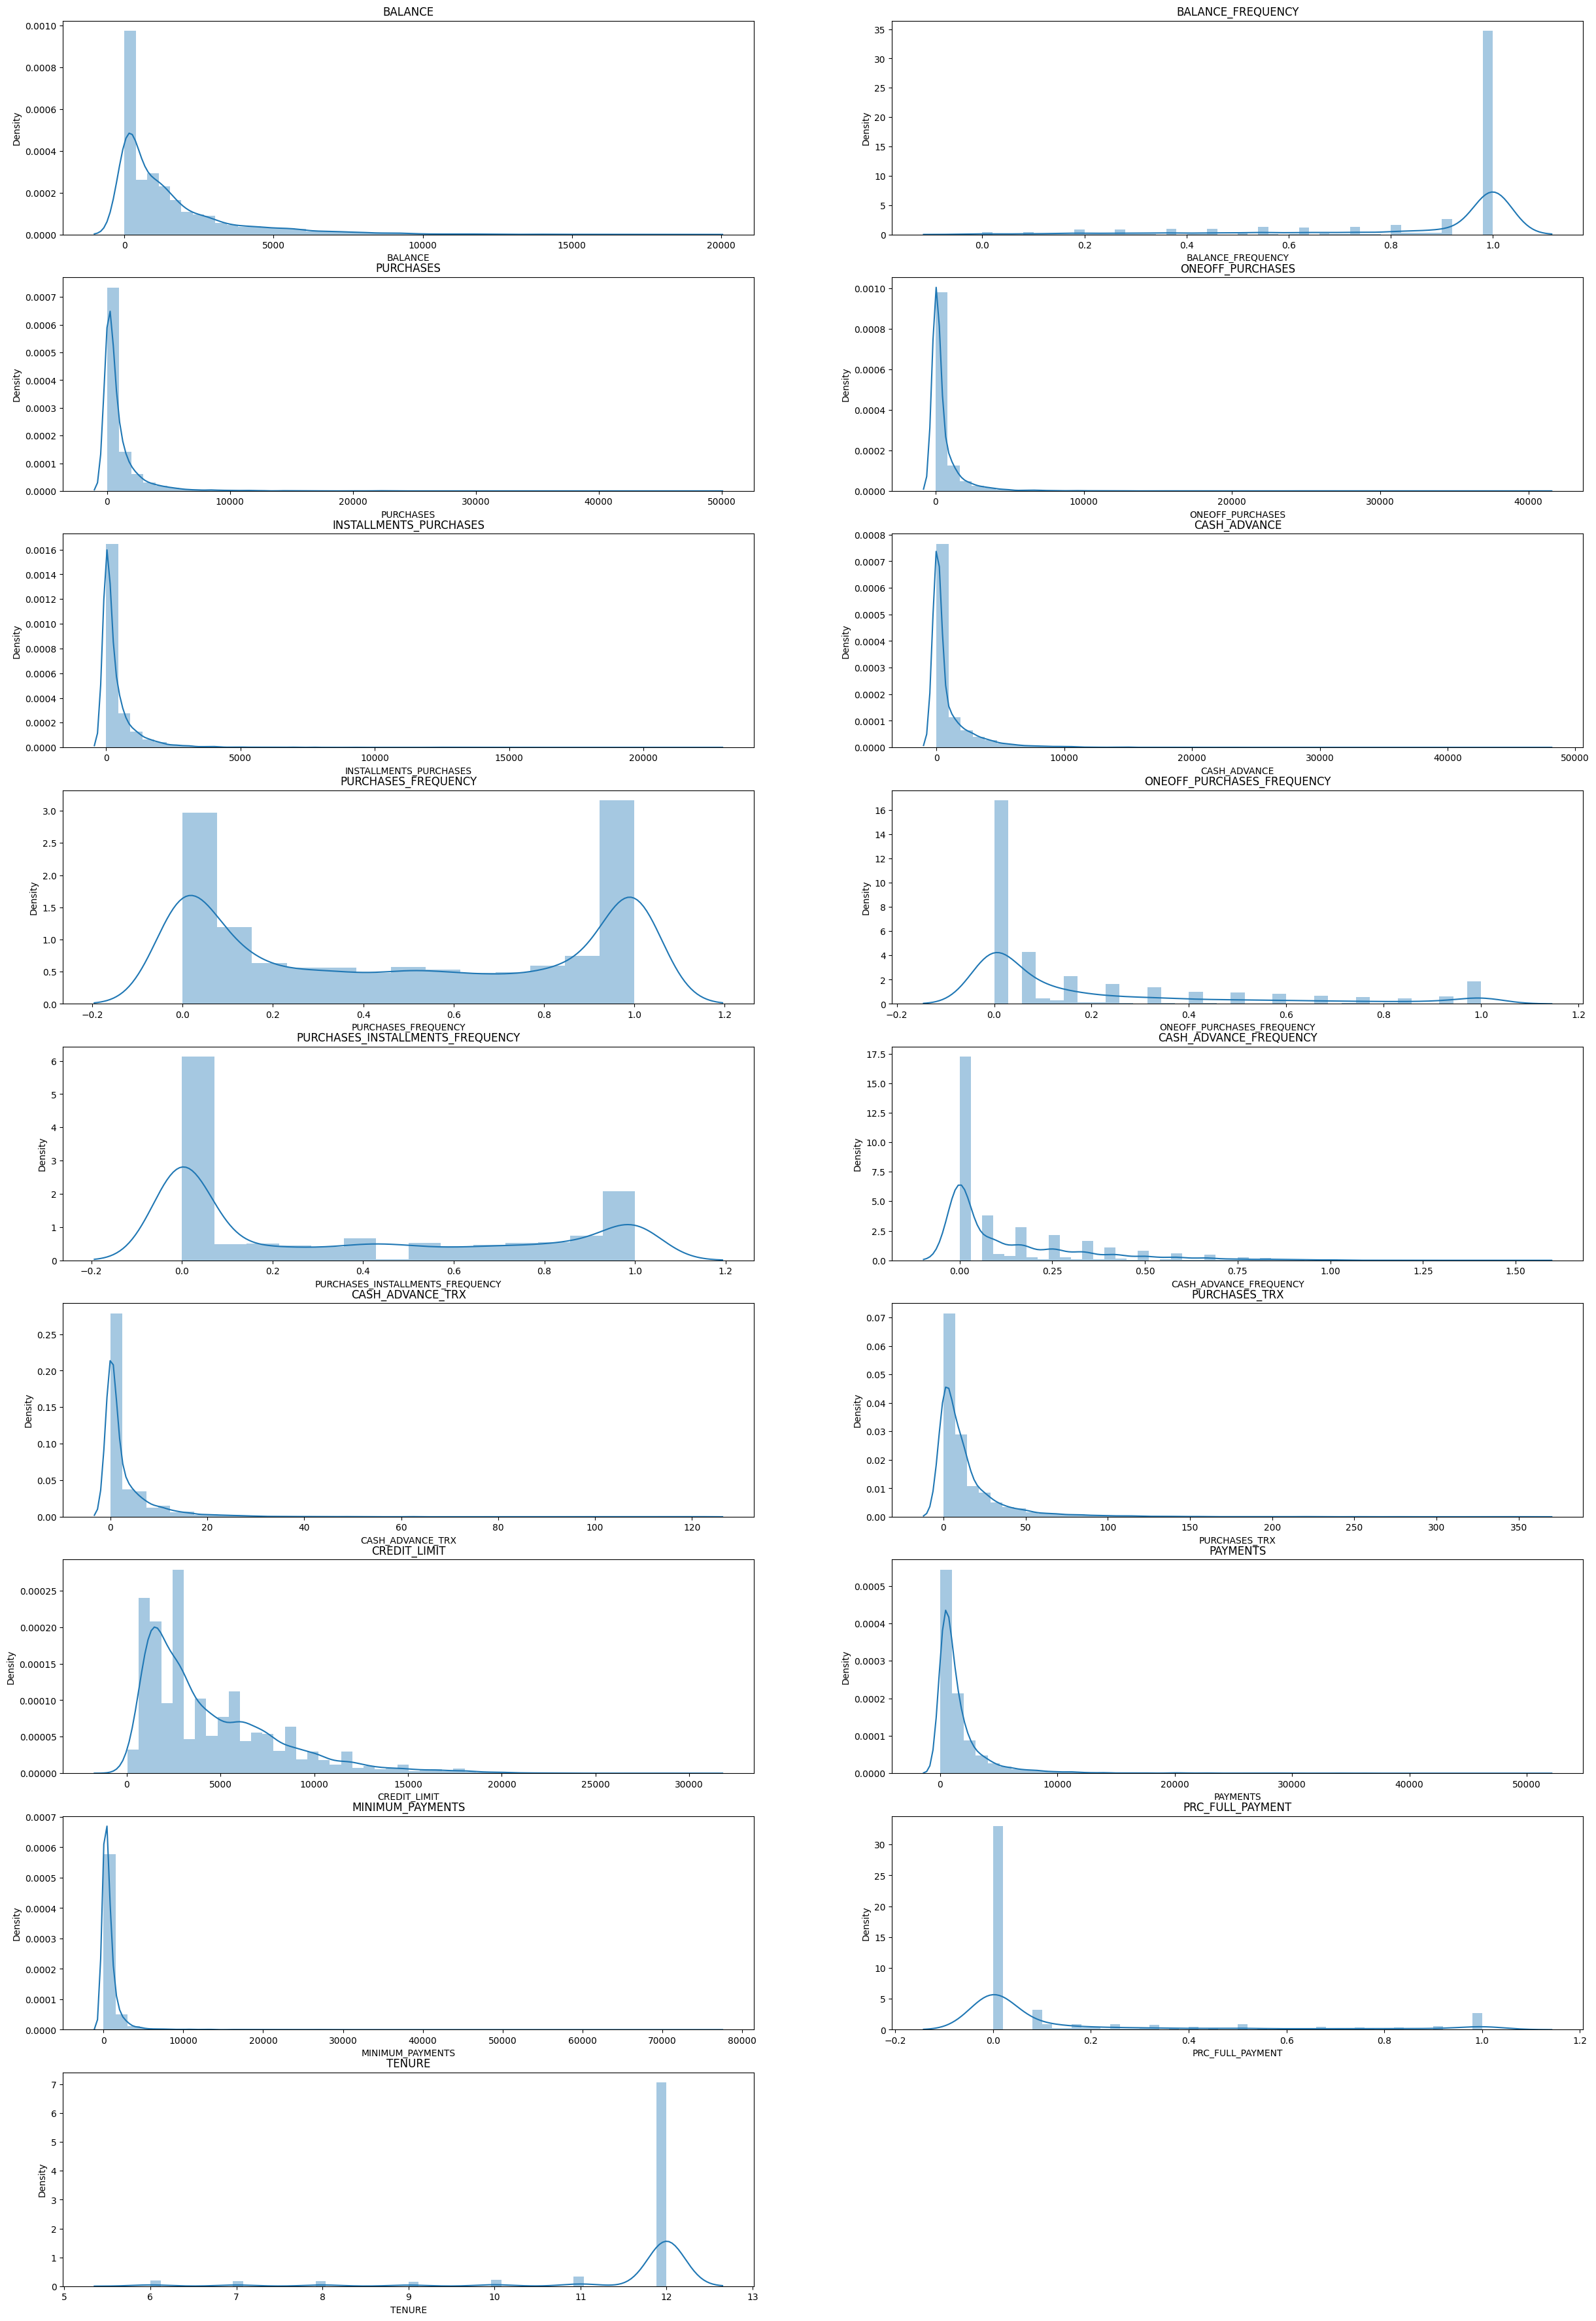

In [17]:
plt.figure(figsize = (30,45))
for i in range(0,17):
  ax = plt.subplot(9, 2, i+1)
  sns.distplot(data[data.columns[i]])
  plt.title(data.columns[i])



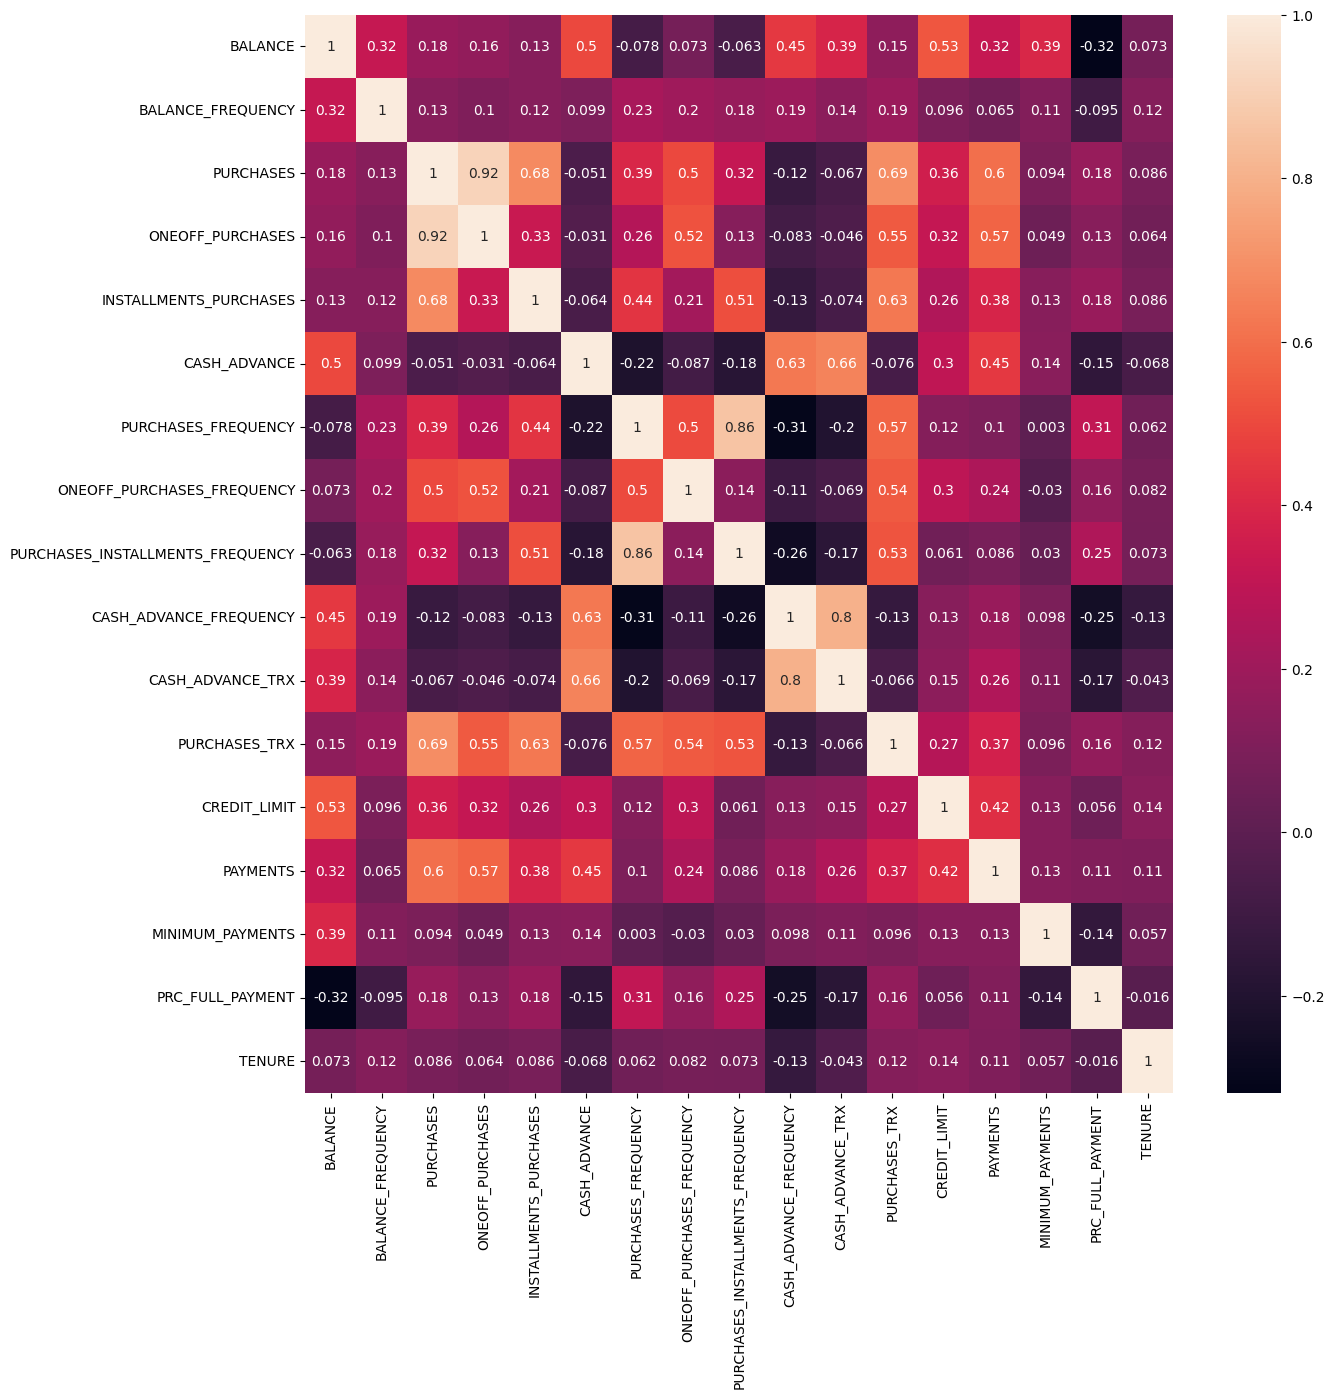

In [18]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [20]:
# Normalizing the input
scalar = StandardScaler()
data = scalar.fit_transform(data)

In [21]:
data = pd.DataFrame(data)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


#### Without Dimensionality Reduction

######To find the optimum k-value, we can either use elbow method or silhuette score

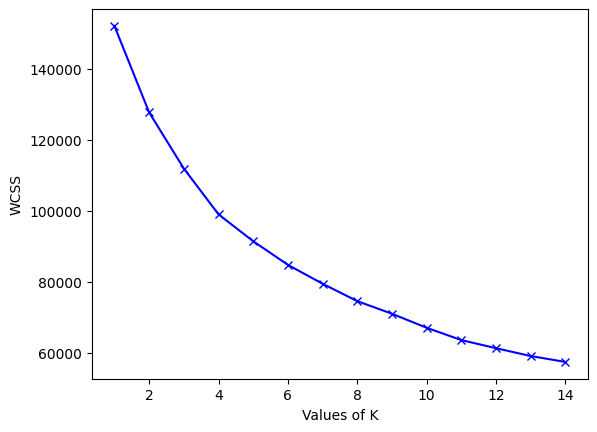

In [22]:


# Elbow method
result = []
rnge = range(1,15)
for i in rnge:
  kMeans = KMeans(n_clusters = i)
  kMeans.fit_predict(data)
  result.append(kMeans.inertia_)

plt.plot(rnge,result, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.show()

In [23]:
from kneed import KneeLocator
kneedle = KneeLocator(rnge, result, S=1.0, curve="convex", direction="decreasing")
print(round(kneedle.elbow, 3))
#with elbow method, we obtained the following k-value

5


####Applying Dimensionality reduction using Principal component analysis

In [24]:

data_c = data_cc.drop(columns = ["CUST_ID"])
data_c.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [25]:
# Normalizing the input
scalar = StandardScaler()
data_norm = scalar.fit_transform(data_c)

In [26]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(data_norm)
data_pca = pd.DataFrame(data = principal_components ,columns = ["PCA1","PCA2"])
data_pca

,PCA1,PCA2
0,-1.682221,-1.076449
1,-1.138301,2.506468
2,0.969687,-0.383524
3,-0.873631,0.043157
4,-1.599433,-0.688575
...,...,...
8945,-0.359627,-2.016139
8946,-0.564368,-1.639115
8947,-0.926202,-1.810779
8948,-2.336550,-0.657954


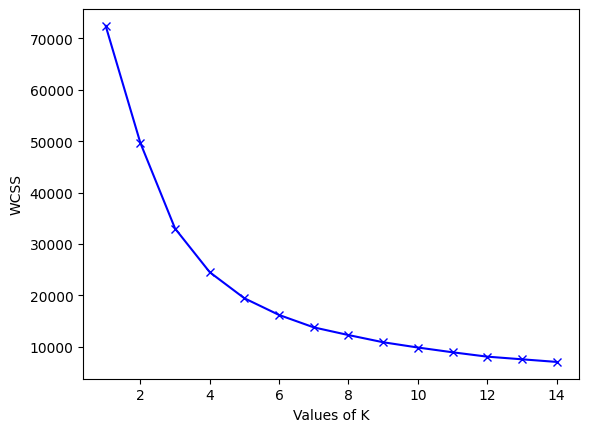

In [27]:
# Elbow method
res = []
rng = range(1,15)
for i in rng:
  kMeans = KMeans(n_clusters = i)
  kMeans.fit_predict(data_pca)
  res.append(kMeans.inertia_)

plt.plot(rng, res, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.show()

In [28]:
# kmeans_model = KMeans(5)
# # kmeans_model.fit_predict(data_norm)
# pca_kmeans = pd.concat([data_pca, pd.DataFrame({'cluster':kmeans_model.labels_})], axis=1)

In [29]:
# plt.figure(figsize = (10,10))
# ax = sns.scatterplot(x = "PCA1", y = "PCA2", hue = "cluster", data = pca_kmeans, palette=['red','blue','black','green'])
# plt.title("Clustering using K-Means Algorithm")
# plt.show()

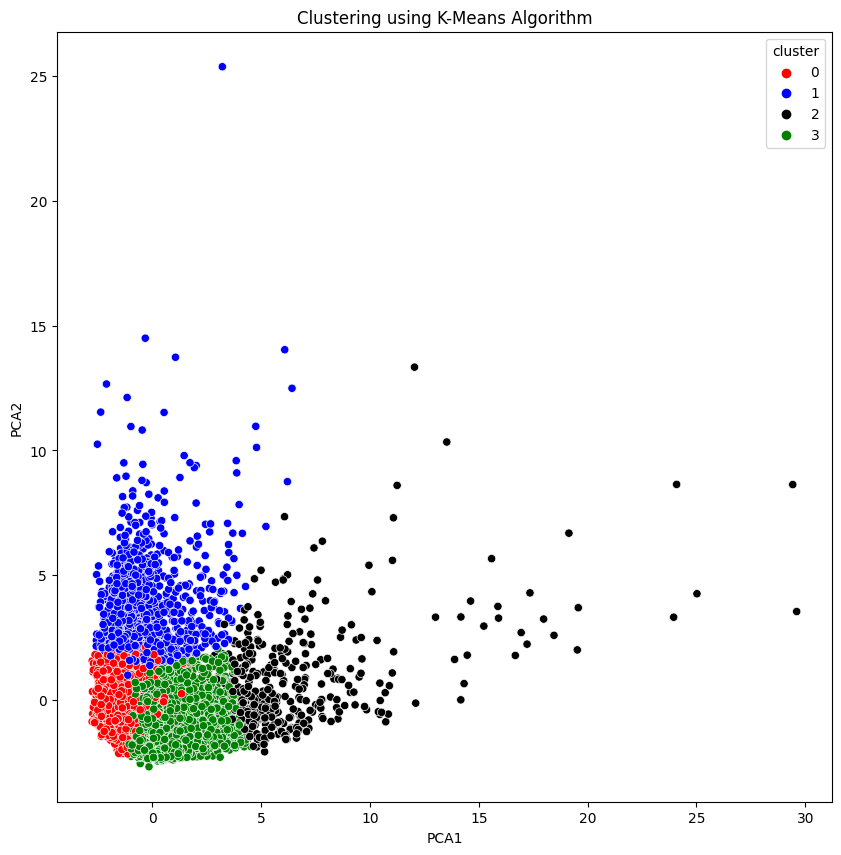

In [30]:
kmeans_model_4 = KMeans(4)
kmeans_model_4.fit_predict(data_norm)
pca_kmeans_4 = pd.concat([data_pca, pd.DataFrame({'cluster':kmeans_model_4.labels_})], axis=1)
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = "PCA1", y = "PCA2", hue = "cluster", data = pca_kmeans_4, palette=['red','blue','black','green'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

####Analysis of Clustered Data

In [31]:
# add cluster centers to the data and denormalization 
cluster_cntrs = pd.DataFrame(data = kmeans_model_4.cluster_centers_, columns = [data_c.columns])
cluster_cntrs = scalar.inverse_transform(cluster_cntrs)
cluster_cntrs = pd.DataFrame(data = cluster_cntrs, columns = [data_c.columns])
cluster_data = pd.concat([data_c, pd.DataFrame({'CLUSTER':kmeans_model_4.labels_})], axis=1)
cluster_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


<Axes: xlabel='CLUSTER', ylabel='count'>

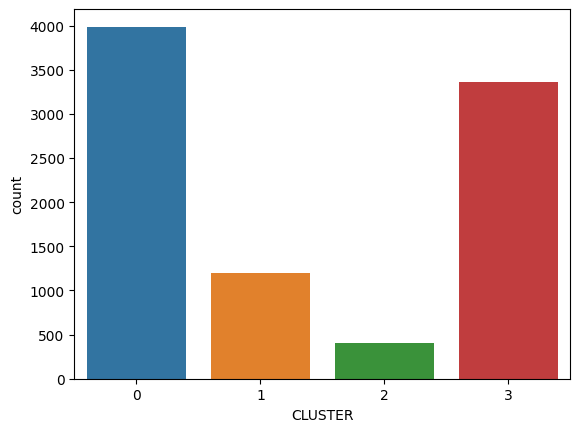

In [32]:
#Visualization
sns.countplot(x = 'CLUSTER', data = cluster_data)

In [33]:
#segregating based on clusters

# Create empty DataFrames for each cluster
cluster_0 = pd.DataFrame()
cluster_1 = pd.DataFrame()
cluster_2 = pd.DataFrame()
cluster_3 = pd.DataFrame()

# Iterate over each row in the DataFrame
for index, row in cluster_data.iterrows():
    cluster = row['CLUSTER']      

    if cluster == 0:
        cluster_0 = cluster_0.append(row)
    elif cluster == 1:
        cluster_1 = cluster_1.append(row)
    elif cluster == 2:
        cluster_2 = cluster_2.append(row)
    elif cluster == 3:
        cluster_3 = cluster_3.append(row)

# Reset the index of each DataFrame
cluster_0.reset_index(drop=True, inplace=True)
cluster_1.reset_index(drop=True, inplace=True)
cluster_2.reset_index(drop=True, inplace=True)
cluster_3.reset_index(drop=True, inplace=True)


cluster_0.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.0,12.0,0.0
1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.0,12.0,0.0
2,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0,0.0
3,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.0,12.0,0.0
4,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.0,12.0,0.0


In [34]:
cluster_1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1.0
1,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4.0,11.0,8000.0,1993.439277,2109.906490,0.000000,12.0,1.0
2,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13.0,13.0,9000.0,9479.043842,1425.426525,0.000000,12.0,1.0
3,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4.0,0.0,6000.0,1422.726707,1657.002877,0.000000,11.0,1.0
4,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16.0,8.0,10500.0,1601.448347,1648.851345,0.000000,12.0,1.0


In [35]:
cluster_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,627.260806,1.0,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,2.0
1,6369.531318,1.0,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6.0,92.0,11250.0,2077.959051,1659.775075,0.000000,12.0,2.0
2,2386.330629,1.0,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0.0,42.0,7500.0,5678.729613,1311.514878,0.083333,12.0,2.0
3,1935.362486,1.0,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1.0,50.0,9000.0,4921.066897,594.756686,0.000000,12.0,2.0
4,9381.255094,1.0,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1.0,46.0,9000.0,6409.496345,9827.045323,0.000000,12.0,2.0


In [36]:
cluster_3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,2495.148862,1.0,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0.0,12.0,7500.0,622.066742,627.284787,0.00,12.0,3.0
1,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0.0,8.0,1800.0,1400.057770,2407.246035,0.00,12.0,3.0
2,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0.0,12.0,2300.0,679.065082,532.033990,0.00,12.0,3.0
3,1293.124939,1.0,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0.0,12.0,1200.0,1083.301007,2172.697765,0.00,12.0,3.0
4,1516.928620,1.0,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0.0,26.0,3000.0,608.263689,490.207013,0.25,12.0,3.0


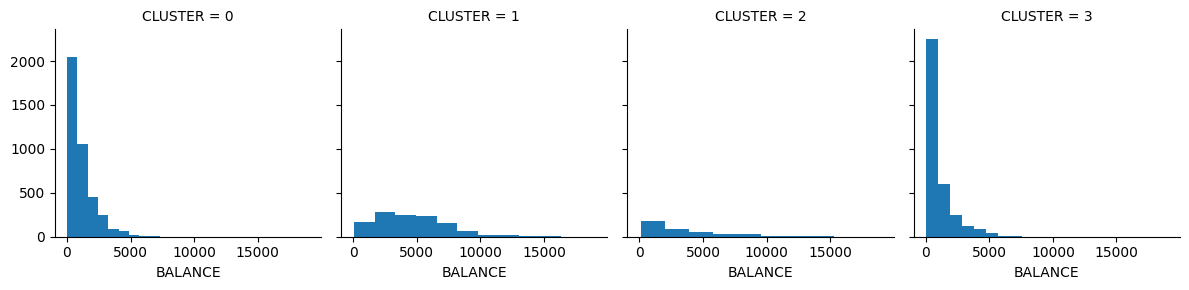

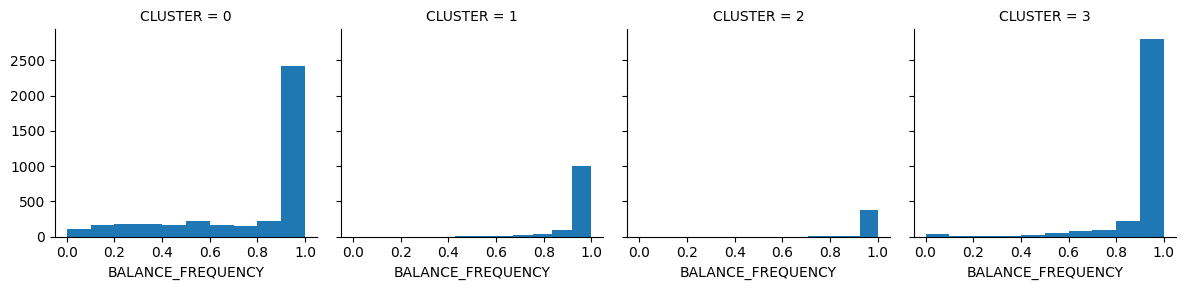

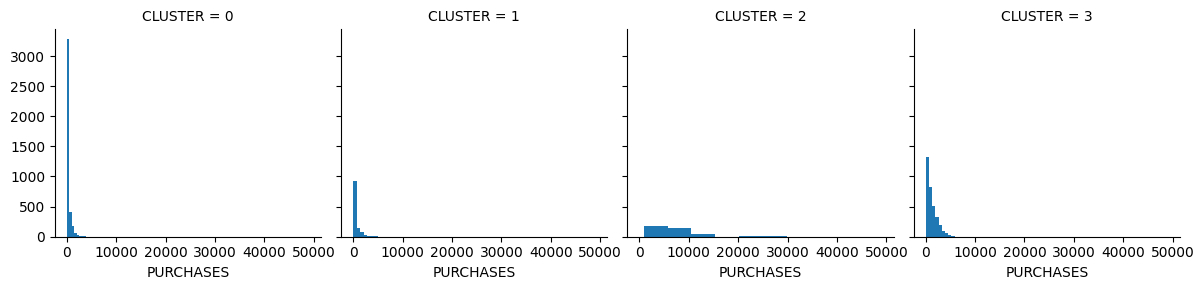

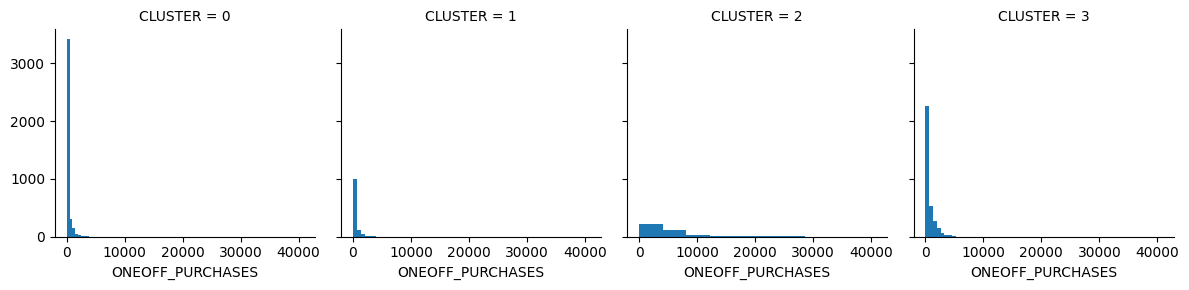

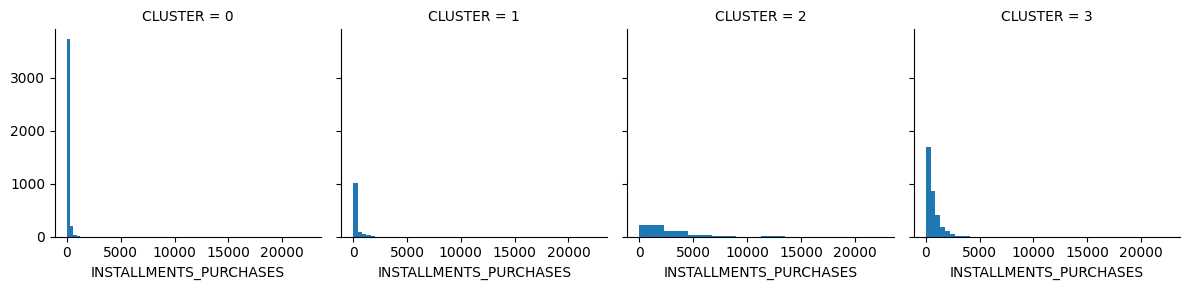

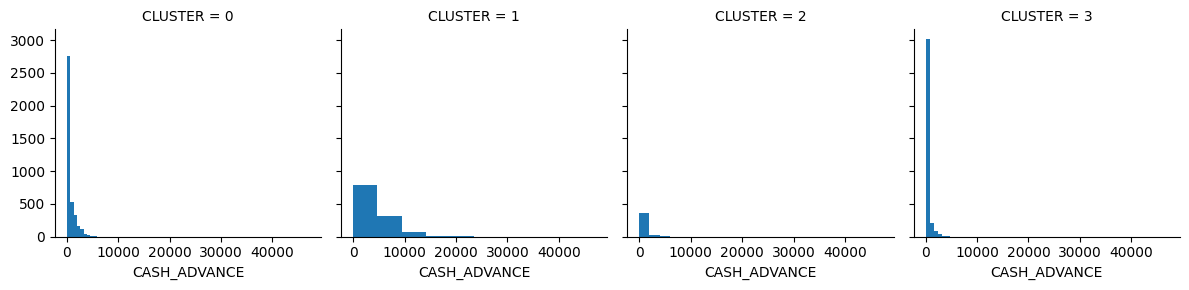

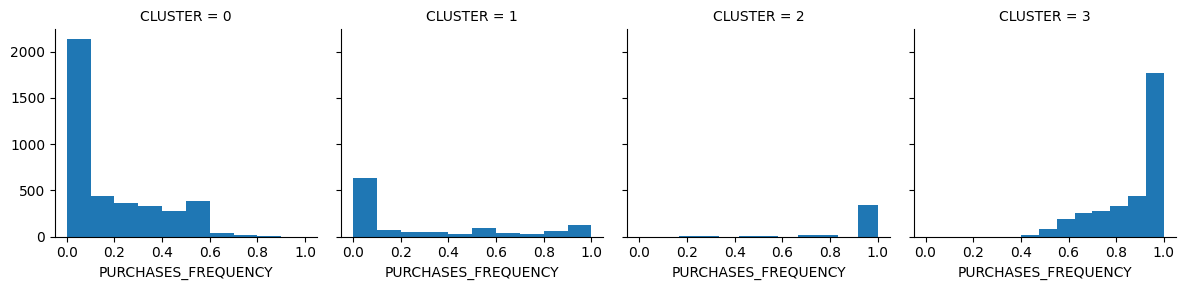

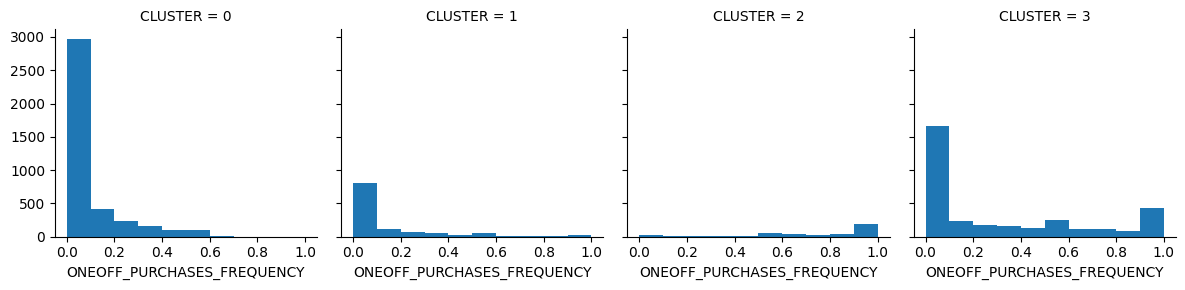

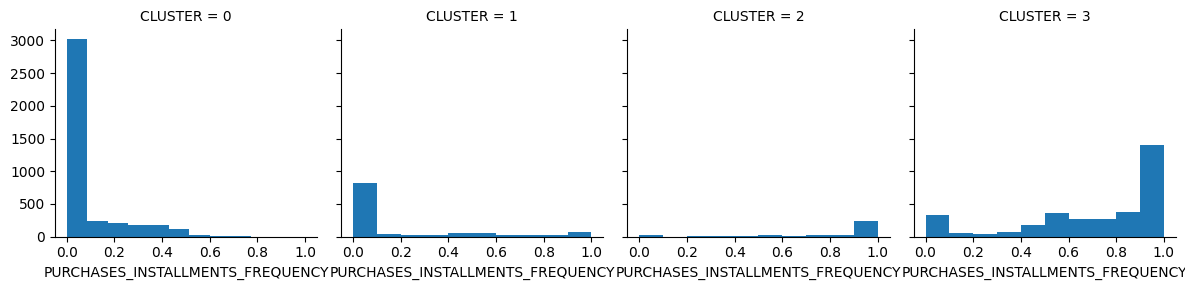

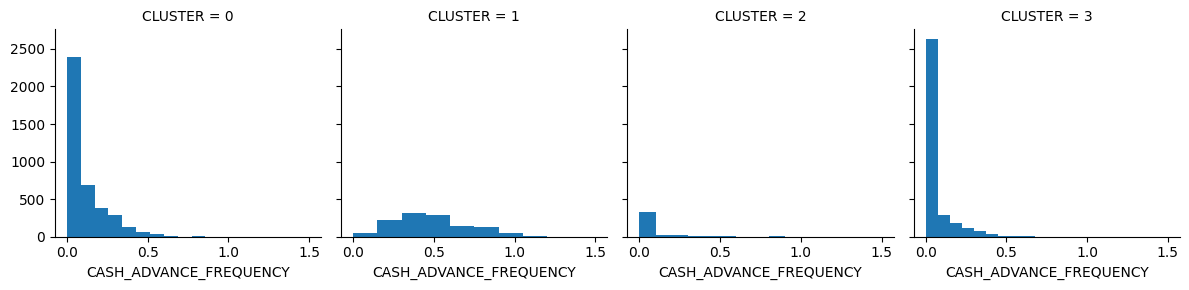

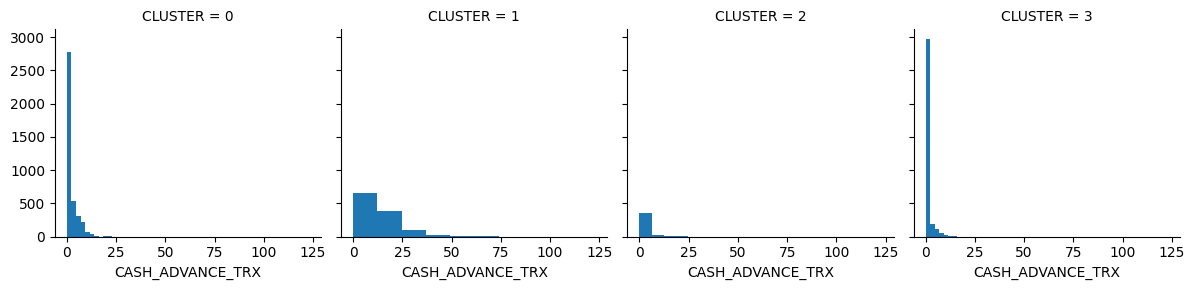

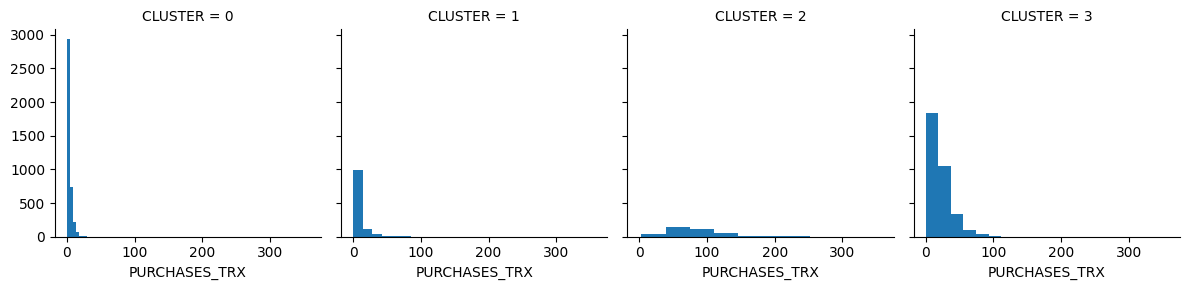

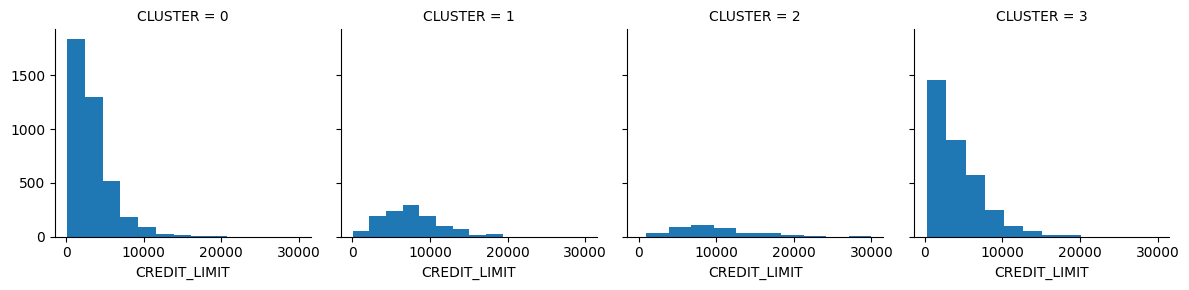

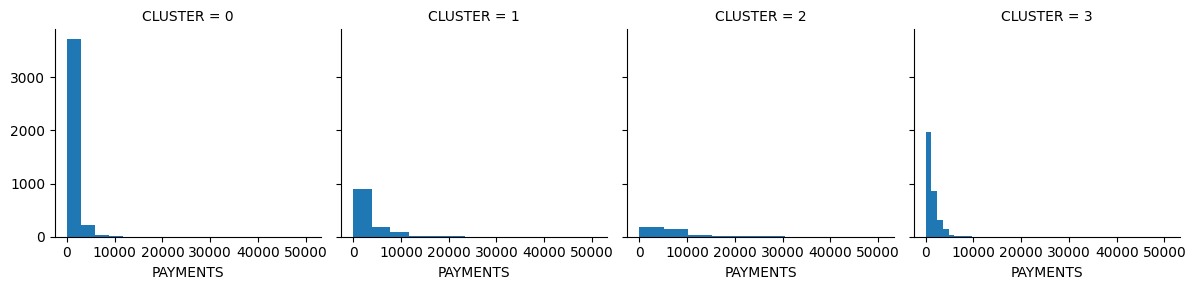

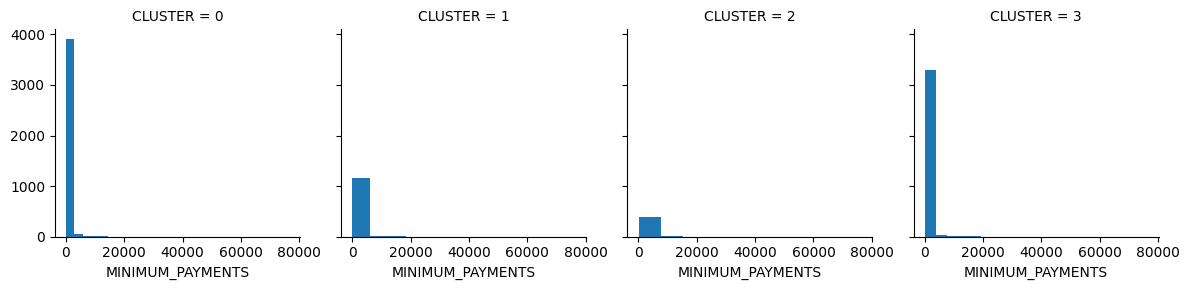

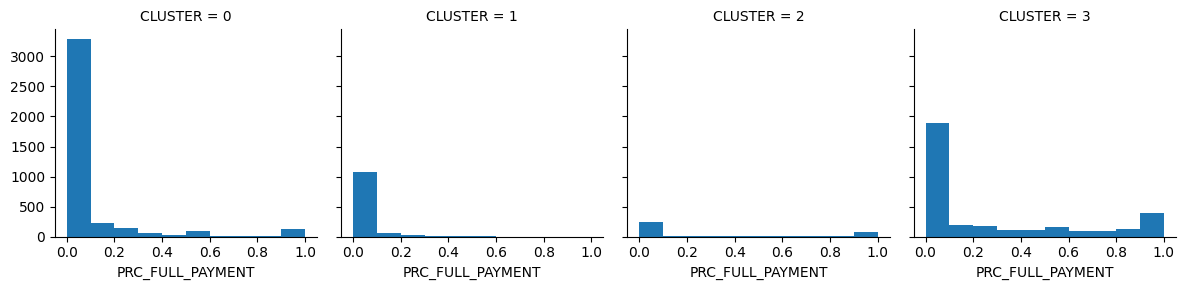

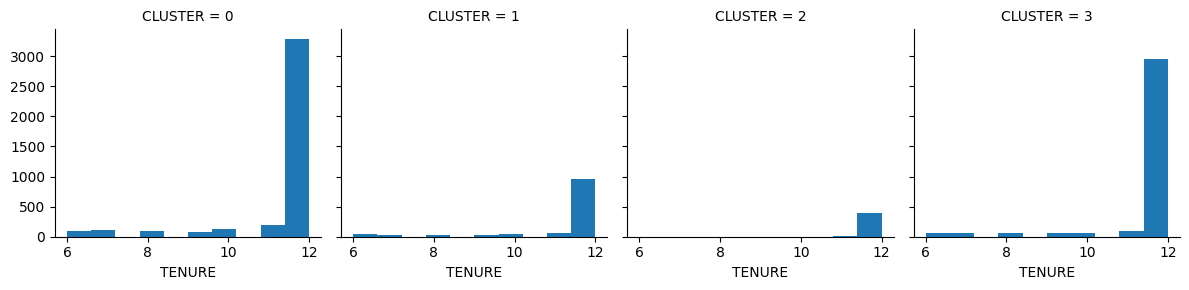

In [37]:
for c in cluster_data.drop(['CLUSTER'], axis=1):
    grid = sns.FacetGrid(cluster_data, col='CLUSTER')
    grid = grid.map(plt.hist, c)
plt.show()

In [38]:
X = cluster_data.drop(['CLUSTER'], axis=1)
y = cluster_data[['CLUSTER']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3)
X_train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1204,39.977967,0.300000,432.05,432.05,0.00,0.000000,0.200000,0.200000,0.000000,0.000000,0,3,10000.0,1282.534281,55.522218,0.000000,10
1323,1279.305202,1.000000,2071.70,2071.70,0.00,2684.141722,0.500000,0.500000,0.000000,0.333333,6,22,2500.0,2792.076889,658.688782,0.250000,12
2764,12.313357,0.636364,107.41,0.00,107.41,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,2500.0,128.572704,91.316321,0.555556,12
1667,7533.854422,1.000000,5253.06,3096.10,2156.96,0.000000,0.916667,0.833333,0.750000,0.000000,0,78,20500.0,1790.394949,1727.487481,0.000000,12
3440,4350.643699,0.900000,1021.19,441.55,579.64,11220.766360,0.800000,0.100000,0.700000,0.500000,20,20,6000.0,7137.368582,1661.123436,0.125000,10


#### ID3 Model: Implement the ID3 decision tree algorithm to build a classification model. Use the features and labels from the clustered data to train the ID3 model. The labels are the classes assigned to each customer cluster.

In [39]:
#ID3 model
model_id3 = DecisionTreeClassifier(criterion = "entropy")
model_id3.fit(X_train, y_train)
y_pred = model_id3.predict(X_test)

##### Performance Evaluation: Evaluating the performance of the ID3 model on the resultant customer clusters. Splitting the data into training and testing sets. The training set to train the ID3 model and then assess its accuracy and predictive ability on the testing set. Calculate metrics such as accuracy, precision, recall, or F1 score to gauge the model's performance

In [40]:
#model evaluation metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1134   22    0   38]
 [  26  310    0   14]
 [   1    5  101   10]
 [  30   10   10  974]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1194
           1       0.89      0.89      0.89       350
           2       0.91      0.86      0.89       117
           3       0.94      0.95      0.95      1024

    accuracy                           0.94      2685
   macro avg       0.92      0.91      0.92      2685
weighted avg       0.94      0.94      0.94      2685



In [41]:
import pickle
filename = 'Customer_Segmentation_model.sav'
pickle.dump(model_id3, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9381750465549348 % Acuuracy
